---
Load Cancer Dataset

In [49]:
import numpy as np
import pandas as pd

X1=pd.read_csv('../../../Fase3_Train_Input.csv')
X2=pd.read_csv('../../../Fase3_Test_Input.csv')
y1=pd.read_csv('../../../Fase3_Train_Targets.csv')
y2=pd.read_csv('../../../Fase3_Test_Targets.csv')
Data=pd.concat([X1, X2]).to_numpy()
Targets=pd.concat([y1, y2]).to_numpy().flatten()

# X1=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y1=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# Data=X1
# Targets=y1


Data Preprocessing
Let's remove unnecessary columns from the dataset.

In [50]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes,....

---
Particionar Data Set

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Targets,
                  train_size=0.7, test_size=0.3, random_state=0, stratify=Targets, shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_train)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (315, 3)
y_test : ['medicamento3' 'medicamento2' 'medicamento1' 'medicamento2'
 'medicamento2' 'medicamento2' 'medicamento2' 'medicamento1'
 'medicamento1' 'medicamento1' 'medicamento3' 'medicamento3'
 'medicamento1' 'medicamento1' 'medicamento1' 'medicamento1'
 'medicamento2' 'medicamento2' 'medicamento2' 'medicamento1'
 'medicamento3' 'medicamento2' 'medicamento1' 'medicamento2'
 'medicamento1' 'medicamento3' 'medicamento3' 'medicamento1'
 'medicamento3' 'medicamento1' 'medicamento3' 'medicamento3'
 'medicamento1' 'medicamento1' 'medicamento1' 'medicamento3'
 'medicamento1' 'medicamento1' 'medicamento2' 'medicamento1'
 'medicamento3' 'medicamento3' 'medicamento2' 'medicamento2'
 'medicamento1' 'medicamento1' 'medicamento2' 'medicamento1'
 'medicamento2' 'medicamento1' 'medicamento1' 'medicamento3'
 'medicamento3' 'medicamento2' 'medicamento3' 'medicamento1'
 'medicamento1' 'medicamento3' 'medicamento1' 'medicamento3'
 'medicamento1' 'medicamento3' 'medicamento3' 'medic

---
Data Preprocessing Let's remove unnecessary columns from the dataset.

In [52]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes,....

---
Building the Naive Bayes Model Classifier





In [53]:
from sklearn.naive_bayes import GaussianNB

nbayes = GaussianNB()

nbayes = nbayes.fit(X_train, y_train)

#Predicting the model on training and test sets.

y_train_pred_nby = nbayes.predict(X_train)
y_test_pred_nby = nbayes.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score
nbayes_train = accuracy_score(y_train, y_train_pred_nby)
nbayes_test = accuracy_score(y_test, y_test_pred_nby)

print(f"Naive Bayes train / test accuracies: {nbayes_train: .3f} / {nbayes_test: .3f}")


Naive Bayes train / test accuracies:  0.981 /  0.978


---
Confusion Matrix 

Test Data Set : Naive Bayes

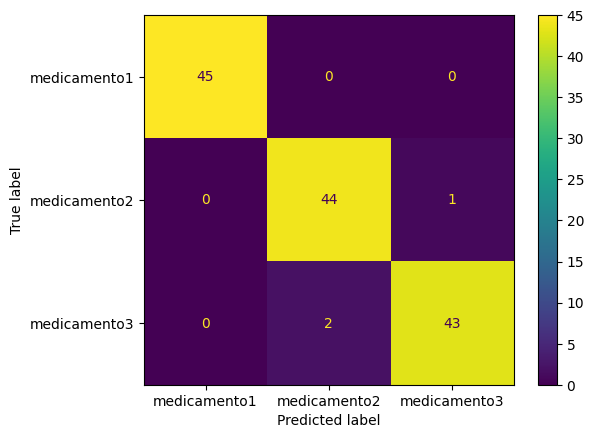

Text(0.5, 1.0, 'Confusion Matrix:  Test - Naive Bayes')

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_nby)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Naive Bayes')

---
Building the Bagging Model

In [55]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=nbayes, n_estimators=100, random_state=0)
#bag = BaggingClassifier(estimator=nbayes, n_estimators=100, random_state=0, max_features=0.7)


bag = bag.fit(X_train, y_train)

#Predicting the model on training and test sets.

y_train_pred_bg = bag.predict(X_train)
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train, y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")


Bagging train/test accuracies:  0.981/ 0.978


---
Confusion Matrix 

Test Data Set : Bagging

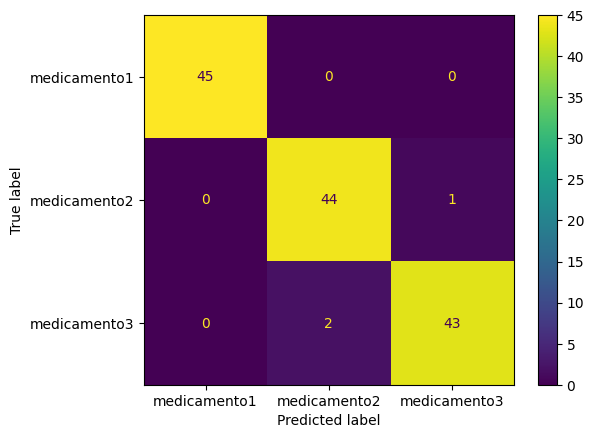

Text(0.5, 1.0, 'Confusion Matrix:  Test - Bagging')

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Bagging')